In [3]:
# ==========================================
# 📘 Granular Distribution Cartography:
# A Creative Histogram Atlas (NumPy, Pandas, Matplotlib)
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Global styling (optional)
plt.rcParams["figure.figsize"] = (8, 5)

# ---------- Data Setup (RUN FIRST) ----------
np.random.seed(7)

# A mixture for rich shapes
x_main = np.concatenate([
    np.random.normal(loc=0.0, scale=1.0, size=700),
    np.random.normal(loc=3.0, scale=0.8, size=300)
])

# A second variable for 2D & stacked demos
y_aux = 0.5 * x_main + np.random.normal(0, 1.0, size=x_main.size)

# Positive-only data for log-binned histograms
x_pos = np.random.lognormal(mean=1.0, sigma=0.6, size=1500)

# Two groups for overlays/stacked
group_A = np.random.normal(loc=-0.5, scale=1.0, size=600)
group_B = np.random.normal(loc=2.0,  scale=0.9, size=600)

# Small multiple groups for ridgeline-like visual
groups = {
    "G1": np.random.normal(-1.0, 0.8, 400),
    "G2": np.random.normal(0.5,  0.9, 400),
    "G3": np.random.normal(2.0,  0.7, 400),
    "G4": np.random.normal(3.0,  0.6, 400),
}


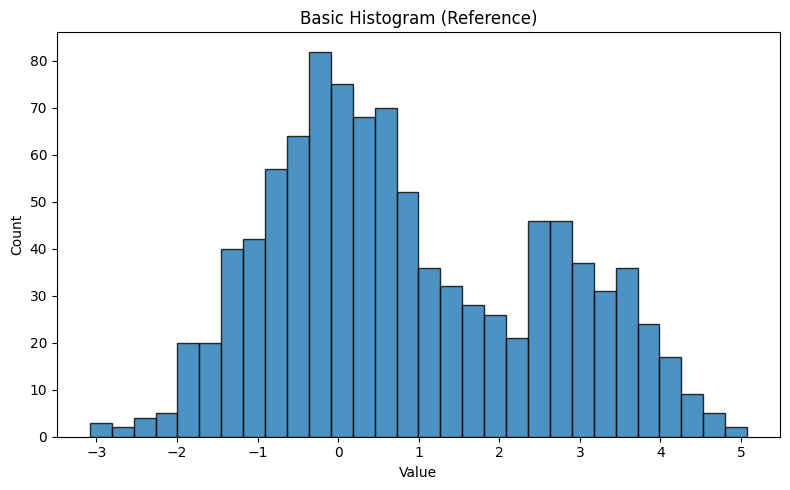

In [4]:
plt.figure()
plt.hist(x_main, bins=30, edgecolor="black", alpha=0.8)
plt.title("Basic Histogram (Reference)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


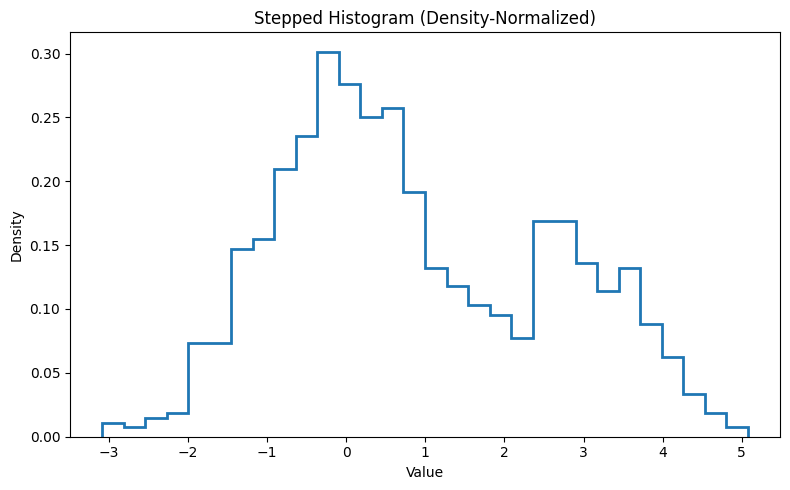

In [5]:
plt.figure()
plt.hist(x_main, bins=30, density=True, histtype="step", linewidth=2)
plt.title("Stepped Histogram (Density-Normalized)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


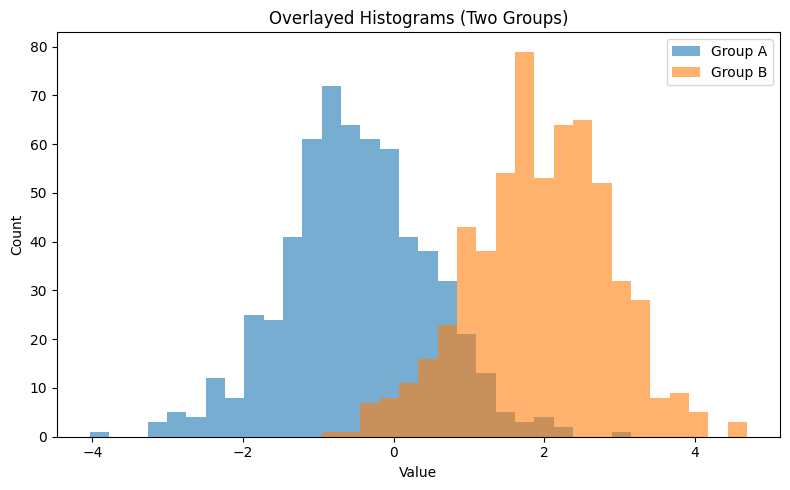

In [6]:
plt.figure()
bins = np.linspace(min(group_A.min(), group_B.min()),
                   max(group_A.max(), group_B.max()), 35)
plt.hist(group_A, bins=bins, alpha=0.6, label="Group A")
plt.hist(group_B, bins=bins, alpha=0.6, label="Group B")
plt.title("Overlayed Histograms (Two Groups)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


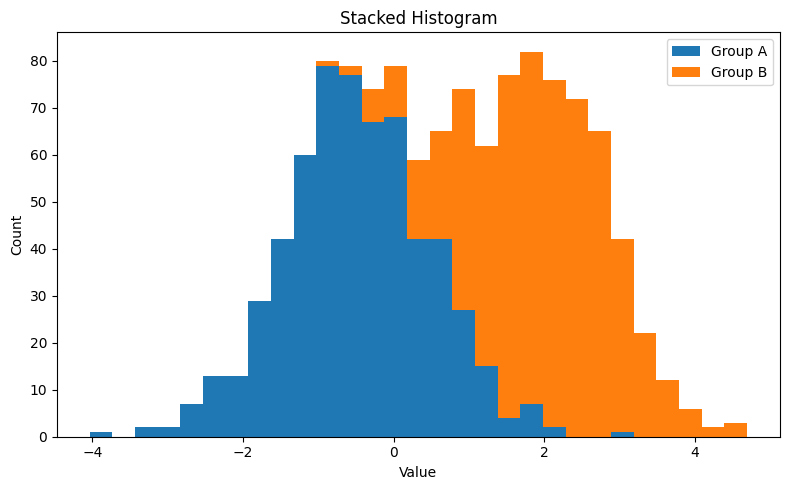

In [7]:
plt.figure()
bins = np.linspace(min(group_A.min(), group_B.min()),
                   max(group_A.max(), group_B.max()), 30)
plt.hist([group_A, group_B], bins=bins, stacked=True, label=["Group A", "Group B"])
plt.title("Stacked Histogram")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


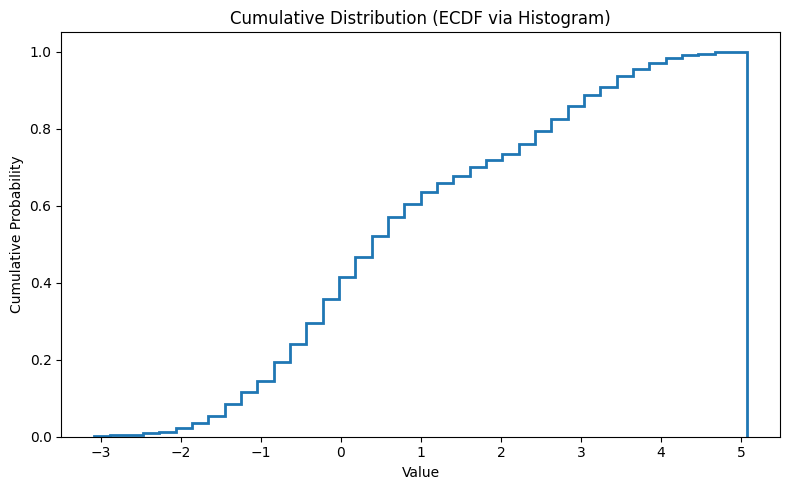

In [8]:
plt.figure()
plt.hist(x_main, bins=40, cumulative=True, density=True, histtype="step", linewidth=2)
plt.title("Cumulative Distribution (ECDF via Histogram)")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.tight_layout()
plt.show()


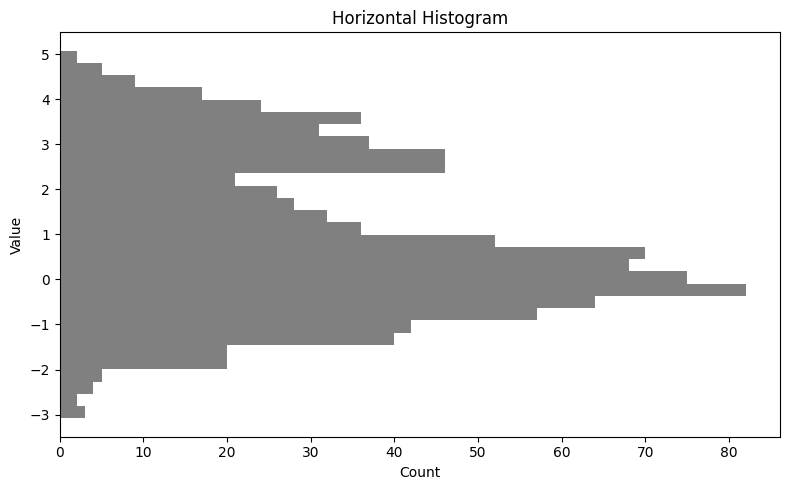

In [9]:
plt.figure()
plt.hist(x_main, bins=30, orientation="horizontal", color="gray")
plt.title("Horizontal Histogram")
plt.xlabel("Count")
plt.ylabel("Value")
plt.tight_layout()
plt.show()


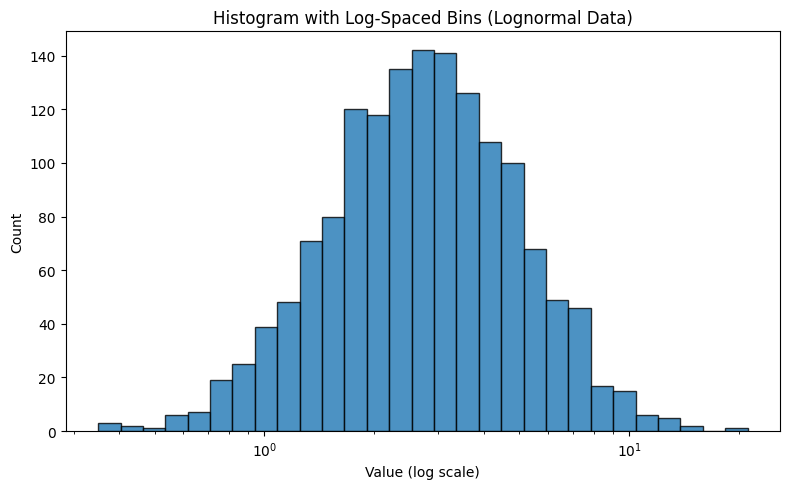

In [10]:
plt.figure()
bins = np.logspace(np.log10(x_pos.min()), np.log10(x_pos.max()), 30)
plt.hist(x_pos, bins=bins, edgecolor="black", alpha=0.8)
plt.xscale("log")
plt.title("Histogram with Log-Spaced Bins (Lognormal Data)")
plt.xlabel("Value (log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


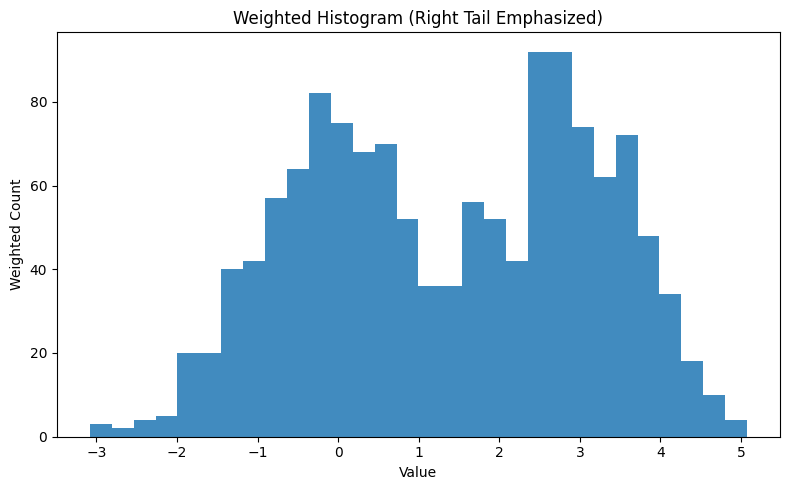

In [11]:
weights = np.where(x_main > 1.5, 2.0, 1.0)  # emphasize right tail
plt.figure()
plt.hist(x_main, bins=30, weights=weights, alpha=0.85)
plt.title("Weighted Histogram (Right Tail Emphasized)")
plt.xlabel("Value")
plt.ylabel("Weighted Count")
plt.tight_layout()
plt.show()


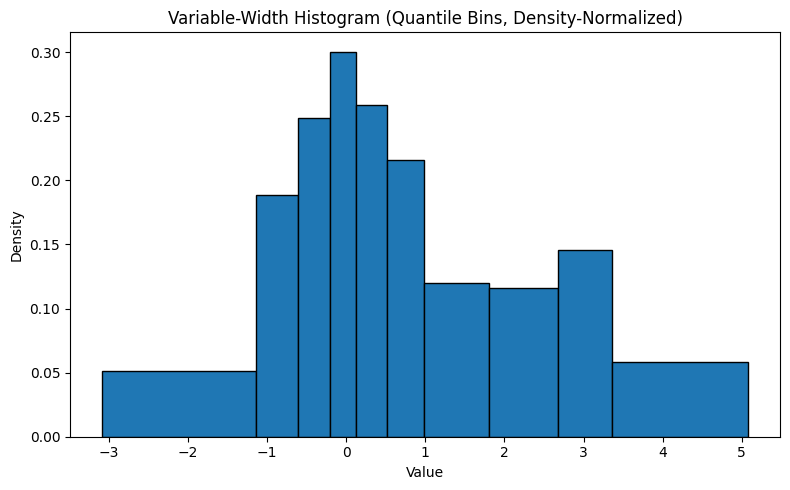

In [12]:
# Equal-frequency bin edges (deciles)
edges = np.quantile(x_main, q=np.linspace(0, 1, 11))
plt.figure()
plt.hist(x_main, bins=edges, density=True, edgecolor="black")
plt.title("Variable-Width Histogram (Quantile Bins, Density-Normalized)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


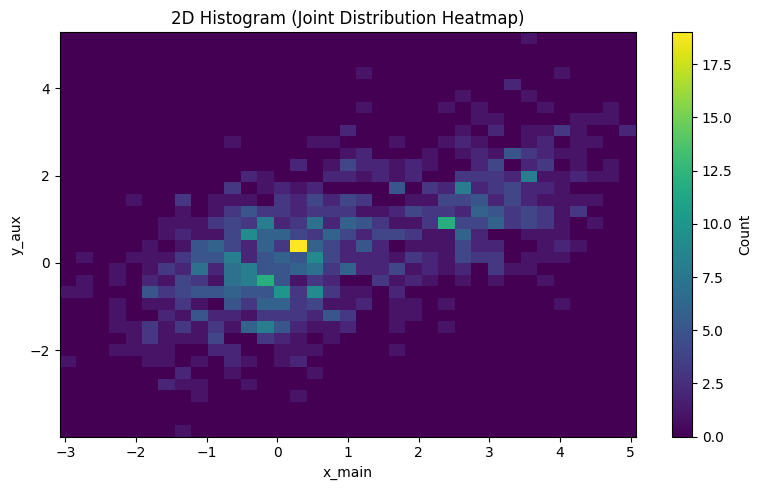

In [13]:
plt.figure()
plt.hist2d(x_main, y_aux, bins=35)
plt.colorbar(label="Count")
plt.title("2D Histogram (Joint Distribution Heatmap)")
plt.xlabel("x_main")
plt.ylabel("y_aux")
plt.tight_layout()
plt.show()


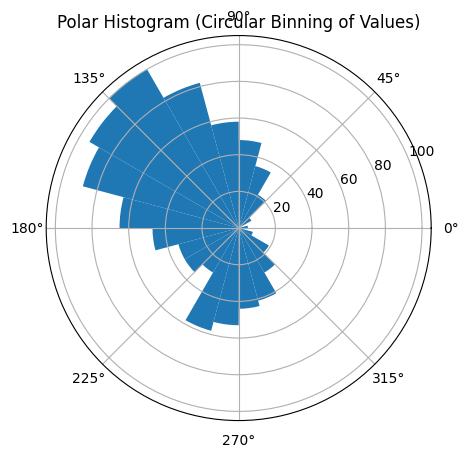

In [14]:
# Map data to angles to create a circular histogram
theta = (x_main - x_main.min()) / (x_main.max() - x_main.min()) * 2*np.pi
ax = plt.subplot(111, projection="polar")
ax.hist(theta, bins=24)
ax.set_title("Polar Histogram (Circular Binning of Values)")
plt.show()


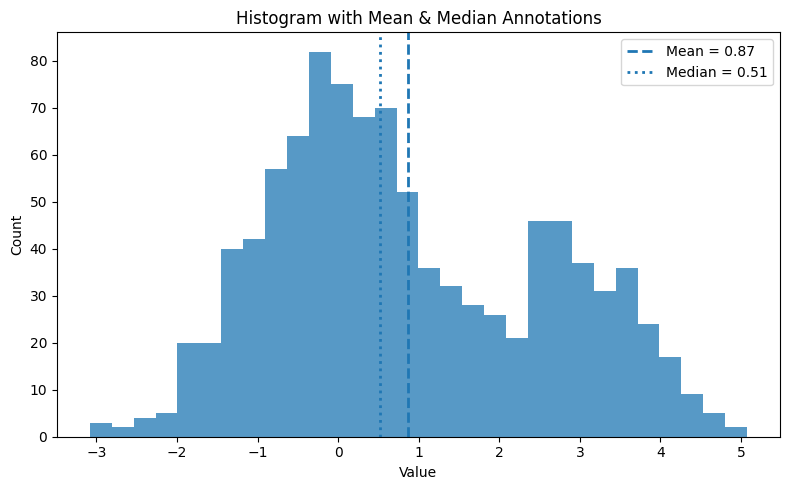

In [15]:
mu = np.mean(x_main)
med = np.median(x_main)

plt.figure()
plt.hist(x_main, bins=30, alpha=0.75)
plt.axvline(mu,  linestyle="--", linewidth=2, label=f"Mean = {mu:.2f}")
plt.axvline(med, linestyle=":",  linewidth=2, label=f"Median = {med:.2f}")
plt.title("Histogram with Mean & Median Annotations")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


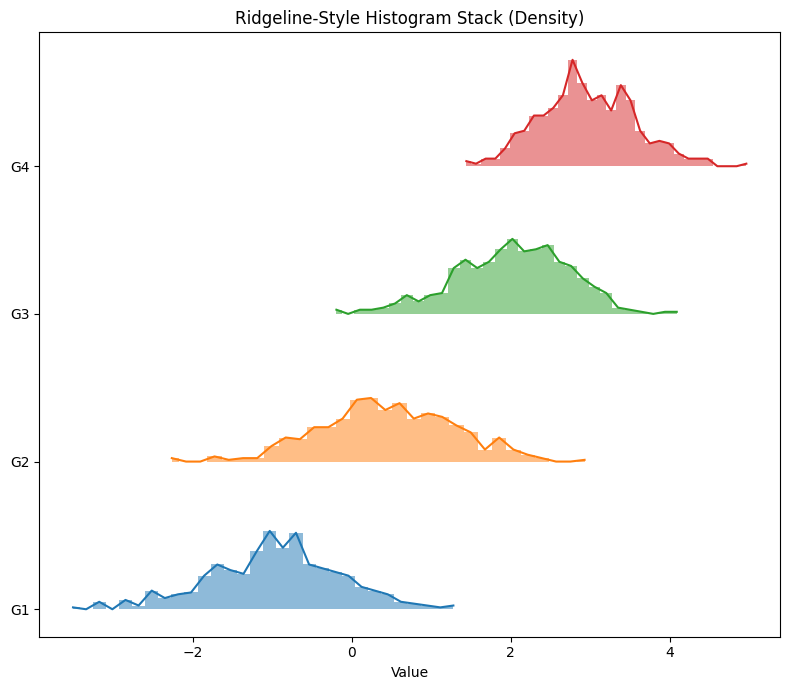

In [16]:
plt.figure(figsize=(8, 7))
offset = 1.2
for i, (name, arr) in enumerate(groups.items()):
    counts, bins = np.histogram(arr, bins=30, density=True)
    centers = 0.5*(bins[:-1] + bins[1:])
    baseline = i * offset
    plt.fill_between(centers, baseline, baseline + counts, alpha=0.5, step="mid", label=name)
    plt.plot(centers, baseline + counts, linewidth=1.5)

plt.yticks([i*offset for i in range(len(groups))], list(groups.keys()))
plt.xlabel("Value")
plt.title("Ridgeline-Style Histogram Stack (Density)")
plt.tight_layout()
plt.show()


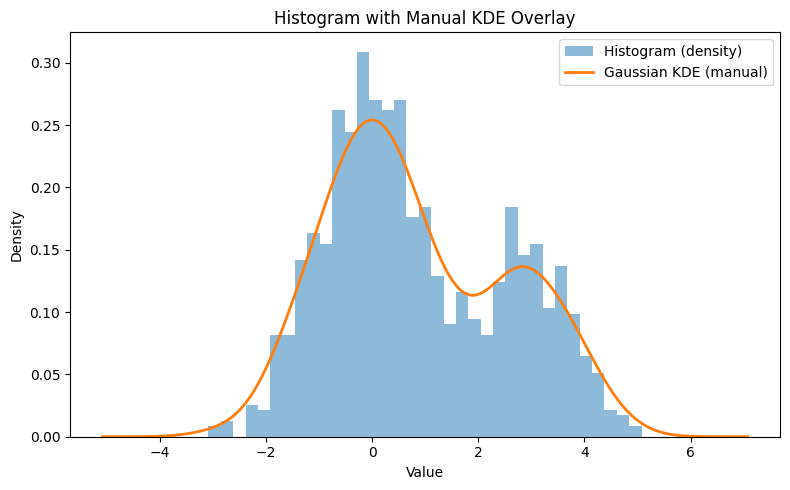

In [17]:
# Simple Gaussian KDE implementation to overlay a smooth curve
def gaussian_kde_1d(samples, grid, bandwidth=0.4):
    # Vectorized KDE calculation
    diffs = grid[:, None] - samples[None, :]
    kernel = np.exp(-0.5 * (diffs / bandwidth)**2) / (bandwidth * np.sqrt(2*np.pi))
    return kernel.mean(axis=1)

grid = np.linspace(x_main.min()-2, x_main.max()+2, 400)
kde = gaussian_kde_1d(x_main, grid, bandwidth=0.5)

plt.figure()
plt.hist(x_main, bins=35, density=True, alpha=0.5, label="Histogram (density)")
plt.plot(grid, kde, linewidth=2, label="Gaussian KDE (manual)")
plt.title("Histogram with Manual KDE Overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()
